In [9]:
import pandas as pd 
import seaborn as sns
import pickle

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

In [10]:
# Load the training and testing data from pickle files
with open('X_train_ethereum.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('X_test_ethereum.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('y_train_ethereum.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('y_test_ethereum.pkl', 'rb') as f:
    y_test = pickle.load(f)



In [11]:
# backfill , ema columns 
X_train = X_train.bfill()
y_train = y_train.dropna()


In [12]:
### for linear regression model , the features extracted are not necessary , will be used in nueral networks

not_ema_features = [x for x in X_train.columns if '_ema' not in x]
print(not_ema_features)
X_train = X_train[not_ema_features]
X_test = X_test[not_ema_features]


['price', 'open', 'high', 'low', 'volume_log']


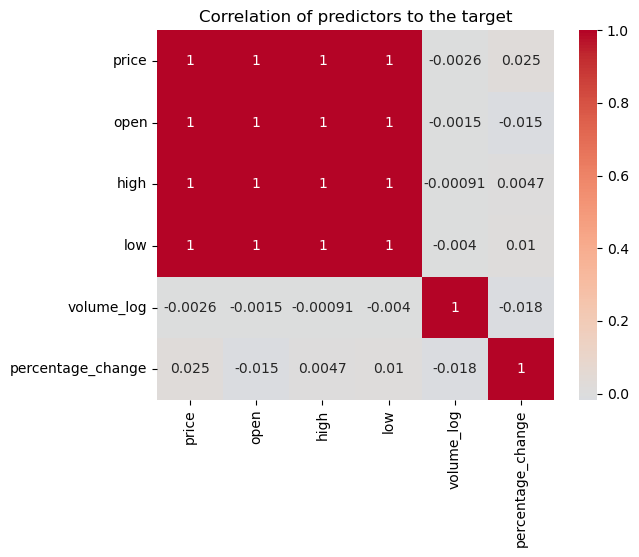

In [13]:
# plot relationships between predictors and target 

train_df = X_train.join(y_train)
correlation_matrix = train_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation of predictors to the target")
plt.show()

In [14]:


# Create PolynomialFeatures object to generate polynomial features
poly_features = PolynomialFeatures(degree=1)

# Transform the training features to polynomial features
X_poly_train = poly_features.fit_transform(X_train)

# Fit a linear regression model on the polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y_train)

# Transform the test features to polynomial features
X_poly_test = poly_features.transform(X_test)

# Predict using the trained model
y_pred = lin_reg.predict(X_poly_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the coefficients and intercept of the polynomial regression model
print("Intercept: ", lin_reg.intercept_)
print("Coefficients: ", lin_reg.coef_)
print("Coefficient of determination (R-squared): ", r2)


Intercept:  [0.92691072]
Coefficients:  [[ 0.          0.0501142  -0.06118785  0.01305334 -0.00276608 -0.03419354]]
Coefficient of determination (R-squared):  0.6471125465169697


In [15]:
import numpy as np

poly_features = PolynomialFeatures(degree=1)

# Transform the training features to polynomial features
X_poly_train = poly_features.fit_transform(X_train)

# Define the hyperparameter grid for random search
param_dist = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
}

# Create a linear regression model
lin_reg = LinearRegression()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=lin_reg,
    param_distributions=param_dist,
    scoring='r2',  # Use R-squared as the scoring metric
    cv=5,  # 5-fold cross-validation
    n_iter=10,  # Number of random iterations
    random_state=42
)

# Fit the random search CV on the polynomial features
random_search.fit(X_poly_train, y_train)

# Get the best estimator
best_lin_reg = random_search.best_estimator_

# Transform the test features to polynomial features
X_poly_test = poly_features.transform(X_test)

# Predict using the best estimator
y_pred = best_lin_reg.predict(X_poly_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the coefficients and intercept of the polynomial regression model
print("Intercept: ", best_lin_reg.intercept_)
print("Coefficients: ", best_lin_reg.coef_)
print("Coefficient of determination (R-squared): ", r2)


Intercept:  [0.92691072]
Coefficients:  [[ 0.          0.0501142  -0.06118785  0.01305334 -0.00276608 -0.03419354]]
Coefficient of determination (R-squared):  0.6471125465169697


c:\Users\rahul\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' w